# Sudden stop Models

## Contractionary Depreciations

This notebook shall help you to replicate "From Sudden Stops to Fisherian Deflation Quantitative Theory and Policy" by Anton Korinek and Enrique Mendoza (2013)

## The setup

Following Mendoza [2010] and Korinek [2011], a model of small open economy(SOE) featuring a continuum of infinitely lived, identical agents facing a CRRA utility function. There is no production, we don’t make a distinction between households, firms or entrepreneurs.


\begin{equation} 
E{}_{0}=
 \left\{ \sum_{t=0}^{\infty}\beta^{t}u(c_{t})\right\}
\end{equation}

The representative agent maximizes the expected future discounted value of consumption where $\beta$ is the subjective discount factor. There are two types of goods available in the economy: traded ones, and non-traded ones. The aggregator for consumption will be of the CES  type.

\begin{equation} 
c_{t}=\left[\alpha\left(c_{t}^{T}\right)^{-\mu}+\left(1-\alpha\right)\left(c_{t}^{N}\right)^{-\mu}\right]^{-1/\mu}
\end{equation}

where $\mu>-1$ , $\alpha\in(0,1)$ and $1/(1+\mu)$ is the elasticity of substitution between tradable and nontradable goods. Each period household receives an endowment  $\left(y^{T},y^{N}\right)$ and decides how much to consume and chooses the level of bond holdings according given budget constraint:

\begin{equation} 
\frac{ b_{t+1}}{R}+c_{t}^{T}+p_{t}^{N}c_{t}^{N}=b_{t}+y_{t}^{T}+p_{t}^{N}y_{t}^{N}
\end{equation}

The price of tradable goods are determined in the world market and taken as numeraire such that price of nontradables $p^N$ is the relative price of non-tradable goods in terms of tradable goods. The menu of assets available for saving purposes is restricted to a one period, non-state-contingent bond denominated in tradables which hold the price $R$ with $R=(1+r)$ where $r$ is the interest rate determined exogenously.

Access to international financial markets is imperfect. We assume that creditors restrict loans such that the value of debt does not exceed a fraction of tradable income $\kappa^T$ plus a fraction $\kappa^N$ of non-tradable income. 

\begin{equation}  
\frac{b_{t+1}}{R}\geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)
\end{equation}

- Equilibrium
The household chooses the stochastic process ${\left\{ c_{t}^{T},c_{t}^{N},b_{t+1}\right\} _{t\geq0}}$ to maximize the expected present discounted value of utility subject to budget and credot constraints taking $b_{0}$ and $p_{t}^{N}$ as given. The first order conditions are:

\begin{equation}
\lambda_{t}=u_{T}\left(t\right)
\end{equation}

\begin{equation} 
p_{t}^{N}=\frac{(1-\alpha)}{\alpha}\left(\frac{c_{t}^{T}}{c_{t}^{N}}\right)^{\mu+1}
\end{equation}

\begin{equation} 
\lambda_{t}=\beta R E_{t}\lambda_{t+1}+\eta_{t}
\end{equation}

\begin{equation} 
\frac{b_{t+1}}{R} \geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)\quad \textrm{with equality if }\quad \eta_{t}>0
\end{equation}


Since household are identical and non-traded goods should be consumed in the domestic market , market clearing conditions are:

\begin{equation}
c_{t}^{N}=y_{t}^{N}
\end{equation}

\begin{equation}
c_{t}^{T}=b_{t}+y_{t}^{T}- \frac{b_{t+1}}{R} 
\end{equation}

Here importantly we see that, in the equilibrium version of the credit constraint $c_{t}^{T}$ enters into the constraint. Price of nontradable goods is a function of both tradable and nontradable consumption such that in case of a binding constraint, a reduction of $c_{t}^{T}$ generates a fall in the price of nontradable consumption which by equation 

> $\frac{b_{t+1}}{R} \geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)$

tightens the credit constraint further. When constraint is loose there is no amplification and price price of nontradables adjust in response to such changes.




For more detailes we refer the reader to the page of Korinek
http://www.korinek.com/suddenstops

## Importing necessary libraries


In [1]:
path = Pkg.dir("Dolo")
import Dolo
using AxisArrays

## Writing the model

In [4]:
#fn = ("https://raw.githubusercontent.com/ezgioz/dolo_models/ezgioz/sudden-stop-models/sudden_stop/sudden_stop_cd.yaml");
fn = "sudden_stop_cd.yaml"


"sudden_stop_cd.yaml"

In [5]:
model = Dolo.yaml_import(fn);

### Characteristics of MC process

In [6]:
#The process hasa transition probability matrix
print(model.exogenous.transitions)
# and values for two states: bad state & good state
print(model.exogenous.values)

[0.05 0.95; 0.05 0.95][1.94; 2.0]

Let us simulate the process


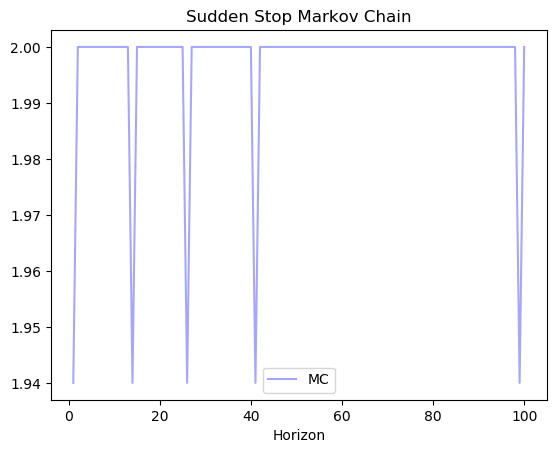

In [7]:
N= 1 # number  of simulations
T=100 # periods of simulation
hor= linspace(1, T, T)

import PyPlot
plt = PyPlot;


Index_mc= Dolo.simulate(model.exogenous, N, T, 1)
sim_mc = model.exogenous.values[Index_mc]


fig = plt.figure("Sudden Stop Markov Chain")

plt.plot(hor, sim_mc, color="blue", alpha = .35, label ="MC")
plt.legend()
plt.xlabel("Horizon");
plt.title("Sudden Stop Markov Chain");

## Solving the model using time iteration routines

The first domain gives a domain error so we start with smaller domain and enlarge the interval in several steps, using each time the previous solution as an inital

In [8]:
model = Dolo.yaml_import(fn);
#ss = Dolo.find_deterministic_equilibrium(model)
res = Dolo.residuals(model)

## OK? Euler is positive because beta*(1+r) < 1, there is a shadow value of relaxing the constraint (?)

Dict{Symbol,Array{Float64,1}} with 2 entries:
  :transition => [0.0]
  :arbitrage  => [0.0, 0.0112]

We can not solve the model for the declared domain so we try for a smaller one

In [9]:
Dolo.set_calibration!(model, :minl, -0.9)
sol = Dolo.time_iteration(model, verbose=true)



------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     2.61e+00        6.64e-01        NaN             2.97e+00        8    
2     2.88e-01        1.33e-01        2.00e-01        1.39e-02        7    
3     1.15e-01        6.44e-02        4.86e-01        1.63e-02        7    
4     6.14e-02        3.72e-02        5.77e-01        1.43e-02        7    
5     3.74e-02        2.35e-02        6.34e-01        2.05e-02        7    
6     2.45e-02        1.58e-02        6.70e-01        1.12e-02        5    
7     1.67e-02        1.09e-02        6.93e-01        1.10e-02        5    
8     1.16e-02        7.73e-03        7.06e-01        1.89e-02        5    
9     8.18e-03        5.49e-03        7.10e-01        9.86e-03        5    
10    5.72e-03        3.87e-03        7.05e-01        9.60e-03        5    
11    3.90e-03        2

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1}
 * Number of iterations: 15
 * Convergence: true
   * |x - x'| < 1.0e-07: true


In [11]:
Dolo.set_calibration!(model, :minl, -1.15)
sol2 = Dolo.time_iteration(model, sol.dr, verbose=true)

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     4.29e-03        9.95e-04        NaN             1.18e-02        5    
2     1.87e-04        9.35e-05        9.40e-02        1.49e-02        3    
3     1.10e-04        5.89e-05        6.30e-01        5.95e-03        3    
4     7.36e-05        4.11e-05        6.98e-01        5.63e-03        3    
5     4.54e-05        2.65e-05        6.45e-01        5.69e-03        3    
6     3.11e-05        1.87e-05        7.05e-01        5.62e-03        3    
7     2.04e-05        1.26e-05        6.74e-01        5.59e-03        3    
8     1.50e-05        9.43e-06        7.49e-01        5.57e-03        3    
9     1.10e-05        7.13e-06        7.56e-01        5.33e-03        3    
10    8.27e-06        5.45e-06        7.65e-01        6.58e-03        3    
11    6.19e-06        4

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1}
 * Number of iterations: 23
 * Convergence: true
   * |x - x'| < 1.0e-07: true


In [12]:
Dolo.set_calibration!(model, :minl, -1.2)
sol3 = Dolo.time_iteration(model, sol2.dr, verbose=true)

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     6.92e-03        1.84e-03        NaN             1.38e-02        5    
2     2.60e-03        1.05e-03        5.68e-01        1.69e-02        5    
3     1.47e-03        6.50e-04        6.21e-01        1.49e-02        4    
4     8.81e-04        4.33e-04        6.66e-01        6.84e-03        3    
5     5.96e-04        3.20e-04        7.39e-01        6.03e-03        3    
6     4.53e-04        2.56e-04        7.98e-01        1.02e-02        3    
7     3.52e-04        2.07e-04        8.09e-01        9.81e-03        3    
8     2.84e-04        1.74e-04        8.40e-01        8.46e-03        3    
9     2.36e-04        1.46e-04        8.43e-01        8.08e-03        3    
10    2.01e-04        1.27e-04        8.69e-01        1.44e-02        3    
11    1.73e-04        1

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1}
 * Number of iterations: 20
 * Convergence: true
   * |x - x'| < 1.0e-07: true


## Plotting the policy function


To plot a decision rule we are using a ${\color{blue}{Dolo.tabulate}}$ function which simulates the variables of the model for a given (provided) state. In the sake of comparability analysis, we are plotting the decision corresponding to the MC case corresponding to the low and high states of endowment.

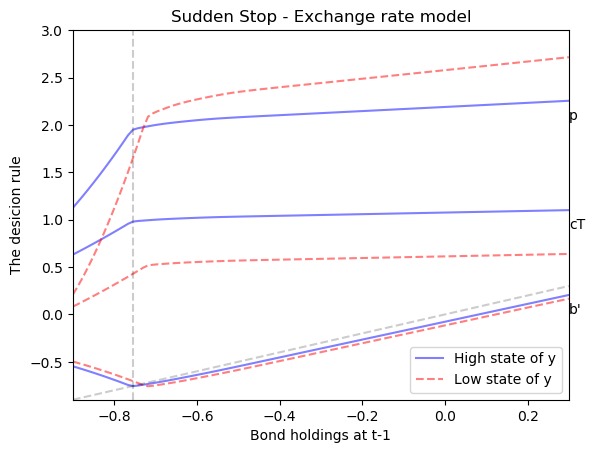

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] abs(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/ezgi/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/ezgi/.julia/v0.6/Compat/src/Compat.jl:386
 [6] eventloop(::ZMQ.Socket) at /home/ezgi/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], in expression starting on line 39


In [18]:
# Simulating a decision rule for MC-discretization case
#dr = sol3.dr ## This doesn't work!! 
##We solved the model at the larger domain providing the dr from the smaller domain but can not tabulate DomainError 

dr = sol.dr # Domain is smaller, minimum state = 0.9 (not -1.2)
s0 = model.calibration[:states]
index = findfirst(model.symbols[:states],:l)

# Define the bounds for your states variable
bounds = [dr.grid_endo.min[index], dr.grid_endo.max[index]]

dr = sol.dr
s0 = model.calibration[:states]
#index = findfirst(model.symbols[:states],:l)

# Define the bounds for your states variable
#bounds = [dr.grid_endo.min[index], dr.grid_endo.max[index]]

df_mc1 = Dolo.tabulate(model, dr, :l, s0, 1)
df_mc2 = Dolo.tabulate(model, dr, :l, s0, 2)

T = 100
hor= linspace(1, T, T)

fig = plt.figure("Competitive Equilibrium")

plt.plot(df_mc1[:l], df_mc2[Axis{:V}(:b)], color="blue", alpha = .5, label="High state of y")
plt.plot(df_mc2[:l], df_mc1[Axis{:V}(:b)], color="red", linestyle="dashed", alpha = .5, label="Low state of y")
plt.text(model.calibration.flat[:maxl], maximum(df_mc2[Axis{:V}(:b)].data) - 0.2, "b'")

plt.plot(df_mc1[:l], df_mc2[Axis{:V}(:cT)], color="blue", alpha = .5,)
plt.plot(df_mc2[:l], df_mc1[Axis{:V}(:cT)], color="red", linestyle="dashed", alpha = .5)
plt.text(model.calibration.flat[:maxl], maximum(df_mc2[Axis{:V}(:cT)].data) - 0.2, "cT")

plt.plot(df_mc1[:l], df_mc2[Axis{:V}(:p)], color="blue", alpha = .5,)
plt.plot(df_mc2[:l], df_mc1[Axis{:V}(:p)], color="red", linestyle="dashed", alpha = .5)
plt.text(model.calibration.flat[:maxl], maximum(df_mc2[Axis{:V}(:p)].data) - 0.2, "p")

plt.axvline(df_mc1[:l].data[findmin(abs(df_mc2[Axis{:V}(:b)].data - df_mc1[:l].data))[2]],color="black", linestyle="dashed", alpha = .2)
plt.plot(df_mc2[:l], df_mc2[:l], color="black", linestyle="dashed", alpha = .2)

plt.ylim((bounds[1],3))
plt.xlim((bounds[1],bounds[2]))

plt.xlabel("Bond holdings at t-1");
plt.legend()
plt.ylabel("The desicion rule");
plt.title("Sudden Stop - Exchange rate model");


### This plot looks wrong --> the dr for cT and p shouldn't be this way 
### See Figure 4 of https://www.sas.upenn.edu/~egme/wp/w19362.pdf

In [19]:
dr = sol3.dr
## They are equal to eachoter
model.domain.min
dr.grid_endo.min


1-element StaticArrays.SArray{Tuple{1},Float64,1,1}:
 -1.2

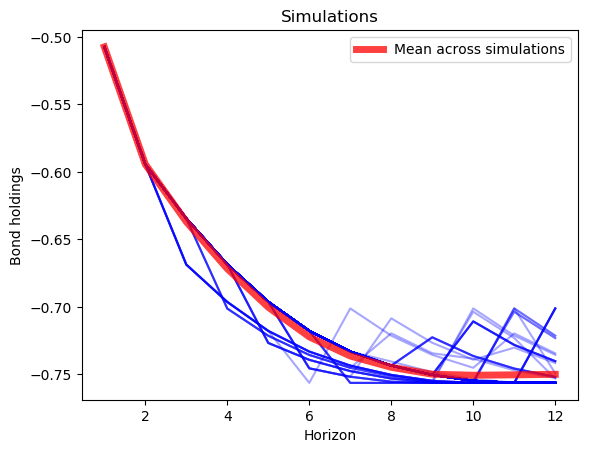

In [20]:
dr = sol3.dr

T = 12
s0 = model.calibration[:states]
#s0[1] = -0.75
sim = Dolo.simulate(model, dr; s0=s0, N=100, T = T)

plt.title("Simulations");
plt.xlabel("Horizon");
plt.ylabel("Bond holdings");
hor = linspace(1, sim[Axis{:T}][end], sim[Axis{:T}][end])

for i in 1:sim[Axis{:N}][end]
   plt.plot(hor, sim[Axis{:N}(i), Axis{:V}(:l)], color="blue", alpha = .35)
end


sim_mean = sum(sim[Axis{:N}(i), Axis{:V}(:l)] for i in 1:sim[Axis{:N}][end] )/sim[Axis{:N}][end]

plt.plot(hor, sim_mean, color="red", alpha = 0.75, linewidth=5, label = "Mean across simulations")
plt.legend();




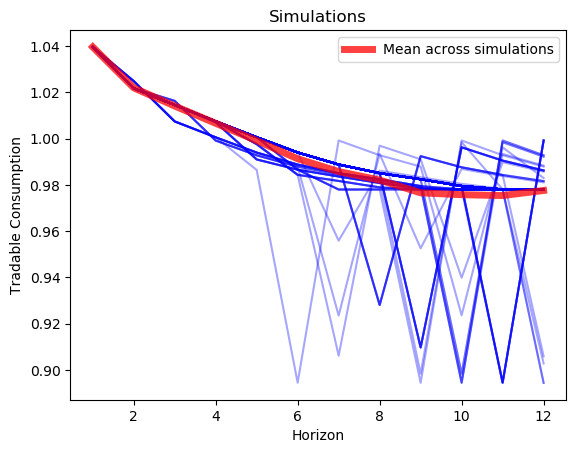

In [21]:
plt.title("Simulations");
plt.xlabel("Horizon");
plt.ylabel("Tradable Consumption");
hor = linspace(1, sim[Axis{:T}][end], sim[Axis{:T}][end])

for i in 1:sim[Axis{:N}][end]
   plt.plot(hor, sim[Axis{:N}(i), Axis{:V}(:cT)], color="blue", alpha = .35)
end

sim_mean = sum(sim[Axis{:N}(i), Axis{:V}(:cT)] for i in 1:sim[Axis{:N}][end] )/sim[Axis{:N}][end]

plt.plot(hor, sim_mean, color="red", alpha = 0.75, linewidth=5, label = "Mean across simulations")
plt.legend();

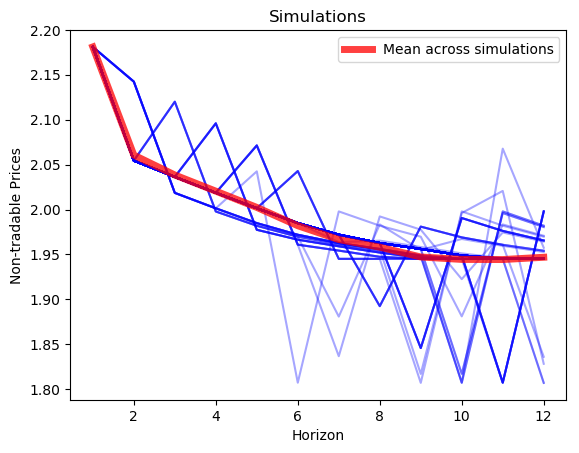

In [22]:
plt.title("Simulations");
plt.xlabel("Horizon");
plt.ylabel("Non-tradable Prices");
hor = linspace(1, sim[Axis{:T}][end], sim[Axis{:T}][end])

for i in 1:sim[Axis{:N}][end]
   plt.plot(hor, sim[Axis{:N}(i), Axis{:V}(:p)], color="blue", alpha = .35)
end

sim_mean = sum(sim[Axis{:N}(i), Axis{:V}(:p)] for i in 1:sim[Axis{:N}][end] )/sim[Axis{:N}][end]

plt.plot(hor, sim_mean, color="red", alpha = 0.75, linewidth=5, label = "Mean across simulations")
plt.legend();

## Simulating the model

tbd